In [1]:
from pandas import json_normalize
import pandas as pd
import json
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from tqdm.notebook import tqdm

def flattened_idx_to_layer_head(flattened_idx, num_heads):
    return flattened_idx // num_heads, flattened_idx % num_heads

def layer_head_to_flattened_idx(layer, head, num_heads):
    return layer * num_heads + head

In [3]:
#path = "./intervention_results/pca_bulk_results/overall_results.json"
path = "./intervention_results/pca_bulk_results_c_1000/overall_results.json"
df = pd.read_json(path)

#df.undefined.values#.idxmax()

In [3]:
df.describe()

,yes,no,undefined,alpha,layer,head
count,1249.000000,1251.000000,1105.000000,1255.00000,1255.000000,1255.00000
mean,16.502002,11.425260,2.485068,60.14741,9.960159,15.30757
std,2.215593,2.308551,2.470479,19.33396,6.664554,9.21086
min,1.000000,1.000000,1.000000,35.00000,0.000000,0.00000
25%,15.000000,10.000000,1.000000,35.00000,4.000000,7.00000
50%,16.000000,11.000000,2.000000,75.00000,9.000000,15.00000
75%,18.000000,13.000000,3.000000,75.00000,14.000000,23.00000
max,30.000000,27.000000,30.000000,75.00000,24.000000,31.00000


In [4]:
df[(df.yes > 21)]

,yes,no,undefined,alpha,layer,head
136,22.0,7.0,1.0,35,4,8
451,22.0,7.0,1.0,35,14,3
492,23.0,4.0,3.0,75,0,26
849,22.0,7.0,1.0,75,11,31
914,25.0,4.0,1.0,75,14,0
917,26.0,3.0,1.0,75,14,3
936,30.0,NaN,NaN,75,14,22
951,24.0,2.0,4.0,75,15,5
952,24.0,6.0,NaN,75,15,6
980,25.0,4.0,1.0,75,16,2


In [14]:
heads_false_direction = df[df.yes > 21][['layer','head']].values

In [3]:
df[(df.no > 17)]

,yes,no,undefined,alpha,layer,head
416,9.0,18.0,3.0,35,13,0
450,12.0,18.0,NaN,35,14,2
599,6.0,21.0,3.0,75,4,5
671,6.0,21.0,3.0,75,6,13
882,NaN,19.0,11.0,75,13,0
893,NaN,27.0,3.0,75,13,11
916,3.0,25.0,2.0,75,14,2
919,9.0,21.0,NaN,75,14,5
935,3.0,26.0,1.0,75,14,21
953,10.0,19.0,1.0,75,15,7


In [19]:
heads_true_direction = df[df.no > 24][['layer','head']].values

In [20]:
df[df.undefined > 25]

,yes,no,undefined,alpha,layer,head
29,NaN,NaN,30.0,35,0,29
495,NaN,NaN,30.0,75,0,29
497,NaN,NaN,30.0,75,0,31
498,1.0,2.0,27.0,75,1,0
744,NaN,1.0,29.0,75,8,22
890,2.0,2.0,26.0,75,13,8


In [21]:
heads_undefined_direction = df[df.undefined > 25][['layer','head']].values

In [22]:
import numpy as np

def reshape_array(arr, num_heads):

    # Example array
    #arr = np.arange(1, 1025)  # This is just an example, replace it with your array.

    # Calculate the padding needed to make the array size divisible by 32
    padding_size = -arr.size % 32  # This will be 0 if the size is already divisible by 32

    # Pad the array. Here, we're padding with zeros. You can change the value if needed.
    padded_arr = np.pad(arr, (0, padding_size), 'constant', constant_values=0)

    # Now, the padded array can be reshaped into n rows by 32 columns
    n = padded_arr.size // 32
    reshaped_array = padded_arr.reshape(n, 32)

    #print(f"Reshaped array into {n} rows and 32 columns.")
    # print the reshaped array to check
    #print(reshaped_array)
    return reshaped_array


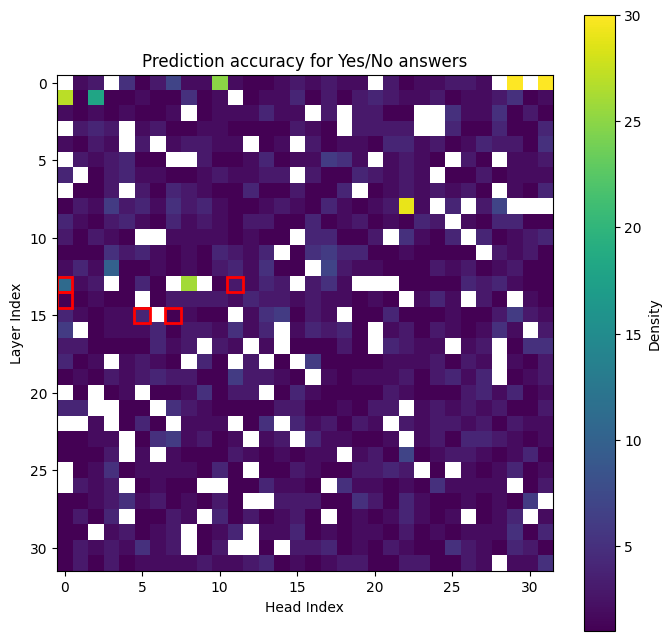

In [23]:
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt
#data = np.random.rand(10,10) # Example data
filt = df[df['alpha']== 75]
#data = ratios.reshape(32,32) # np.random.rand(32, 32)  # Example data
data = reshape_array(filt.undefined.values, 32)
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(data, cmap='viridis', interpolation='nearest')

heads = [(13, 0), (13, 11), (14, 0), (15, 5), (15, 7)]

# Add a colorbar associated with the Axes object's content
fig.colorbar(cax, ax=ax, label='Density')

# Set titles and labels
ax.set_title('Prediction accuracy for Yes/No answers')
ax.set_xlabel('Head Index')
ax.set_ylabel('Layer Index')

#x, y = 5, 5  # for example, highlighting the field at (5, 5)
for head in heads: 
    # Coordinates of the field you want to highlight
    # Note: Matplotlib's coordinate system starts from the top left corner as (0, 0)
    x = head[1]
    y = head[0]
    #print(data[head[0], head[1]])
    # Create a rectangle outline
    # Arguments: (x, y) - lower left corner, width, height, edgecolor, and fill
    rect = Rectangle((x-0.5, y-0.5), 1, 1, linewidth=2, edgecolor='r', facecolor='none')

    # Add the rectangle to the Axes
    ax.add_patch(rect)



plt.show()

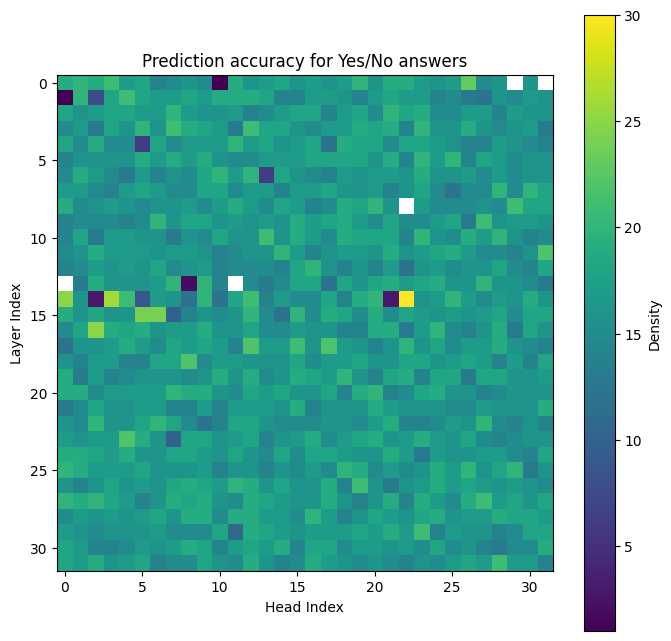

In [24]:
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt
#data = np.random.rand(10,10) # Example data

filt = df[df['alpha']== 75]
#data = ratios.reshape(32,32) # np.random.rand(32, 32)  # Example data
data = reshape_array(filt.yes.values, 32)
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(data, cmap='viridis', interpolation='nearest')

heads = [(13, 0), (13, 11), (14, 0), (15, 5), (15, 7)]

#x, y = 5, 5  # for example, highlighting the field at (5, 5)
# for head in heads: 
#     # Coordinates of the field you want to highlight
#     # Note: Matplotlib's coordinate system starts from the top left corner as (0, 0)
#     x = head[1]
#     y = head[0]
#     print(data[head[0], head[1]])
#     # Create a rectangle outline
#     # Arguments: (x, y) - lower left corner, width, height, edgecolor, and fill
#     rect = Rectangle((x-0.5, y-0.5), 1, 1, linewidth=2, edgecolor='r', facecolor='none')

#     # Add the rectangle to the Axes
#     ax.add_patch(rect)

# Add a colorbar associated with the Axes object's content
fig.colorbar(cax, ax=ax, label='Density')

# Set titles and labels
ax.set_title('Prediction accuracy for Yes/No answers')
ax.set_xlabel('Head Index')
ax.set_ylabel('Layer Index')

plt.show()

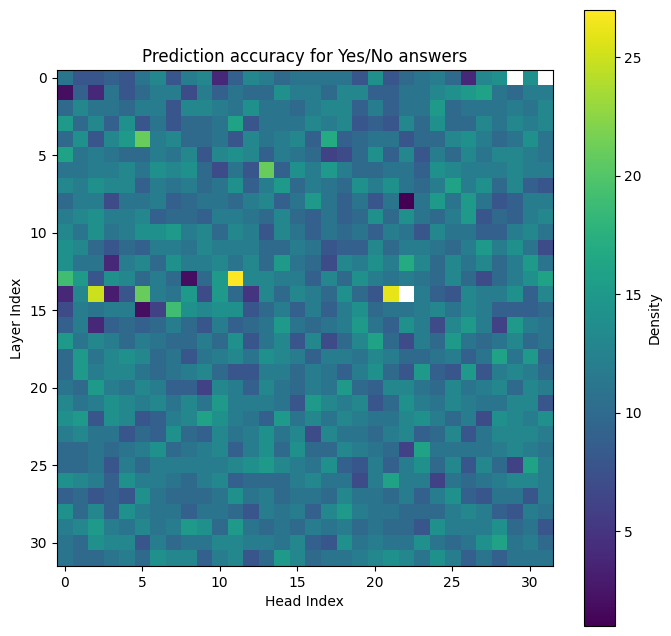

In [25]:
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt
#data = np.random.rand(10,10) # Example data

#data = ratios.reshape(32,32) # np.random.rand(32, 32)  # Example data

filt = df[df['alpha']== 75]
#data = ratios.reshape(32,32) # np.random.rand(32, 32)  # Example data
data = reshape_array(filt.no.values, 32)
#data = reshape_array(df.no.values, 32)
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(data, cmap='viridis', interpolation='nearest')

heads = [(13, 0), (13, 11), (14, 0), (15, 5), (15, 7)]

#x, y = 5, 5  # for example, highlighting the field at (5, 5)
# for head in heads: 
#     # Coordinates of the field you want to highlight
#     # Note: Matplotlib's coordinate system starts from the top left corner as (0, 0)
#     x = head[1]
#     y = head[0]
#     print(data[head[0], head[1]])
#     # Create a rectangle outline
#     # Arguments: (x, y) - lower left corner, width, height, edgecolor, and fill
#     rect = Rectangle((x-0.5, y-0.5), 1, 1, linewidth=2, edgecolor='r', facecolor='none')

#     # Add the rectangle to the Axes
#     ax.add_patch(rect)

# Add a colorbar associated with the Axes object's content
fig.colorbar(cax, ax=ax, label='Density')

# Set titles and labels
ax.set_title('Prediction accuracy for Yes/No answers')
ax.set_xlabel('Head Index')
ax.set_ylabel('Layer Index')

plt.show()

In [12]:
import pandas as pd

df = pd.read_json("requirements_data/dataframe_open_chat_cot_moon_06022024_attentions_gt.json")

df.reset_index(drop=True, inplace=True)
correct = [0 if value == "yes" else 1 for value in df.predict.values]
df.correct = correct

In [13]:
from dataclasses import dataclass
import numpy as np
@dataclass
class Args:
    #model_name: str
    #dataset_name: str
    #activations_dataset: str
    val_ratio: float
    use_center_of_mass: bool
    use_random_dir: bool
    seed: int
    num_heads: int

args = Args(val_ratio=0.5, use_center_of_mass=False, use_random_dir=False, seed=42, num_heads=12)

num_layers =32
num_heads = 32

seed = 42

import numpy as np 

index_dic = {}
separated_activations = []
separated_labels = []
reqs_order = []
for req_id in df['req_id'].unique():

    req_df = df[df['req_id'] == req_id].index

    #req_ids.append(req_df)
    index_dic[req_id] = list(req_df)
    
    temp_activations = df[df['req_id'] == req_id].attentions
    activations = np.array([list(sample.values()) for sample in temp_activations.values])#.shape
    batch_length = len(temp_activations)
    dim = 128
    activations = np.reshape(activations, (batch_length, 32, 32, dim))

    temp_labels = [1 if label==True else 0 for label in df[df['req_id'] == req_id]['correct'].values]
    separated_labels.append(temp_labels)
    separated_activations.append(activations)
    reqs_order.append(req_id)

number_of_examples = np.arange(len(reqs_order))


fold_results = []
fold_probes = []

# get two folds using numpy
num_fold = 1
fold_idxs = np.array_split(number_of_examples, num_fold)
for i in range(len(fold_idxs)):
    print(i)
    if num_fold == 1: 
        train_idxs = np.arange(len(reqs_order))
    else:
        train_idxs = np.concatenate([fold_idxs[j] for j in range(num_fold) if j != i])

    val_ratio = args.val_ratio
    seed = 42  # You can choose your own seed value
    rng = np.random.default_rng(seed)
    size = int(len(train_idxs)*(1-val_ratio))
    #print(size)
    train_set_idxs = rng.choice(train_idxs, size=size, replace=False)
    val_set_idxs = np.array([x for x in train_idxs if x not in train_set_idxs])

    if len(fold_idxs) == 1:
        test_idxs = val_set_idxs
    else:
        test_idxs = fold_idxs[i]

    print(fold_idxs)
    print(train_idxs)
    print("Train indexes:" , train_set_idxs)
    print("Validation indexes: ", val_set_idxs)
    #print(test_idxs)

    # train_index_list = np.concatenate([list(index_dic.values())[i] for i in train_set_idxs], axis = 0)
    # train_set = df.loc[train_index_list]

    # rng = np.random.default_rng(seed)
    # val_idxs = val_set_idxs
    # probes, all_head_accs_np, train_accs = train_probes(seed, train_set_idxs, val_idxs, separated_activations , separated_labels, num_layers=num_layers, num_heads=num_heads)
    # fold_probes.append(probes)
    # fold_results.append(all_head_accs_np)

0
[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Train indexes: [17 34  5 31 38 25  4  1 15 18 24  2 39 22 29 32 28 10 19 16]
Validation indexes:  [ 0  3  6  7  8  9 11 12 13 14 20 21 23 26 27 30 33 35 36 37]


In [14]:
def remove_outliers(tuning_data, filter_data, labels):

    # Calculate mean and standard deviation
    means = tuning_data.mean(axis=0)
    stds = tuning_data.std(axis=0)

    # Calculate z-scores
    z_scores = np.abs((filter_data - means) / stds)

    # Set a threshold
    threshold = 4

    # Find where all features have a z-score less than the threshold
    non_outliers = (z_scores < threshold).all(axis=1)

    # Filter out the outliers
    filtered_data = filter_data[non_outliers]
    filter_labels = labels[non_outliers]
    #print(filter_data.shape)
    #print(filter_labels.shape)
    return filtered_data, filter_labels

In [15]:
from sklearn.decomposition import PCA
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import colorsys
def adjust_hue_saturation_lightness_from_name(color_name, hue_shift, saturation_scale, lightness_scale):
    # Convert color name to RGB
    rgb_color = mcolors.to_rgb(color_name)
    
    # Convert RGB to HLS
    h, l, s = colorsys.rgb_to_hls(*rgb_color)
    
    # Adjust Hue, Lightness, and Saturation
    h = (h + hue_shift) % 1.0
    l = max(0, min(1, l * lightness_scale))
    s = max(0, min(1, s * saturation_scale))
    
    # Convert back to RGB
    adjusted_color = colorsys.hls_to_rgb(h, l, s)
    return adjusted_color

def plot_pcas(all_X_train, all_X_val, y_train_set, y_val_set, heads, rm_outliers=False, slice_idx=-1): 
    
    if len(heads) % 2!= 0:

        n_rows = len(heads) // 2 + 1
    else: 
        n_rows = len(heads) // 2

    fig, axes = plt.subplots(nrows= n_rows, ncols= 2, figsize=(16, 4*n_rows))
    
    for id, head in enumerate(heads):

        ax = fig.axes[id] 
        ax.set_title(str(head))
        layer = head[0]
        h = head[1]
        
        X_train = all_X_train[:,layer,h,:slice_idx]
        print(X_train.shape)
        y_train = y_train_set
        X_val = all_X_val[:,layer,h,:slice_idx]
        X_val.shape
        y_val = y_val_set
        # # Standardizing the data
        # scaler = StandardScaler()
        # scaler = scaler.fit(X_train)
        # X_train = scaler.transform(X_train)
        # X_val = scaler.transform(X_val)

        # # Filtering for outliers
        if rm_outliers:

            X_val, y_val = remove_outliers(X_train, X_val, y_val)
            X_train, y_train = remove_outliers(X_train, X_train, y_train)
            #print(X_train.shape)
            #print(X_train.shape)

        cl = PCA(n_components=2, random_state=args.seed).fit(X_train)
        pca = cl
        #explained_variance = pca.explained_variance_
        #print("Explained Variance:", explained_variance)


        # If you want the ratio of explained variance, which tells you the proportion
        # of the dataset's variance lying along each principal component, you can use:
        print("Head: " + str(head))
        explained_variance_ratio = pca.explained_variance_ratio_
        print("Explained Variance Ratio:", explained_variance_ratio)

        X_reduction = cl.transform(X_train)
        X_val_reduction = cl.transform(X_val)
        
        indexes_val = np.where(y_val == True)[0]
        samples_1 = [X_val_reduction[i] for i in indexes_val]
        indexes_val = np.where(y_val == False)[0]
        samples_2 = [X_val_reduction[i] for i in indexes_val]

        # indexes_val = np.where(y_train == True)[0]
        # samples_1 = [X_reduction[i] for i in indexes_val]

        # indexes_val = np.where(y_train == False)[0]
        # samples_2 = [X_reduction[i] for i in indexes_val]
        # print(str(head))
        # print(calculate_snr(samples_1, samples_2))

        for label, color in zip([True, False], ['blue', 'red']):

            indexes_val = np.where(y_train == label)[0]
            #samples = [X_val_reduction[i] for i in indexes_val]

            for idx in indexes_val:

                ax.scatter(X_reduction[idx,0], X_reduction[idx, 1], color=color, label=str(idx), alpha=0.5)

            
            indexes_val = np.where(y_val == label)[0]
            samples = [X_val_reduction[i] for i in indexes_val]

            for idx in indexes_val:
                # Adjust the hue by 0.1, increase lightness by 20%, and keep the same saturation
                adjusted_color = adjust_hue_saturation_lightness_from_name(color, 0.1, 1.0, 1.2)
                ax.scatter(X_val_reduction[idx,0], X_val_reduction[idx, 1], color=adjusted_color, label=str(idx), alpha=0.5)
                
                #for i, idx in enumerate(df_reduced[indices_to_keep].index):
                    #if idx in df_reduced[df_reduced['req_id'].isin(filt)].index :
                    #ax.text(reduced_embeddings[idx, 0], reduced_embeddings[idx, 1], str(idx))
                                #print(idx)

                #ax.scatter(X_reduction[idx,0], X_reduction[idx, 1], c=color, label=str(idx))
                #ax.scatter(X_reduction[idx,0], 1, c=color, label=str(idx))
                
        # Adjusting tick label font sizes using tick_params
        ax.tick_params(axis='x', labelsize=12)  # Adjust font size for x-axis tick labels
        ax.tick_params(axis='y', labelsize=12)  # Adjust font size for y-axis tick labels
        


import itertools

def plot_pcas_nd(all_X_train, all_X_val, y_train_set, y_val_set, heads, k=4, rm_outliers=False): 

    num_combinations = len(list(itertools.combinations(range(k), 2)))
    n_rows = len(heads) * (num_combinations // 2 + 1) if num_combinations % 2 != 0 else len(heads) * (num_combinations // 2)
    
    #n_rows = num_combinations // 2 + 1 if num_combinations % 2 != 0 else num_combinations // 2
    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(16, 4 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easier indexing
    for id, head in enumerate(heads):
        #print(str(head))
        layer = head[0]
        h = head[1]

        X_train = all_X_train[:, layer, h, :]
        y_train = y_train_set
        X_val = all_X_val[:, layer, h, :]
        y_val = y_val_set

        # Filtering for outliers
        if rm_outliers:
            X_val, y_val = remove_outliers(X_train, X_val, y_val)
            X_train, y_train = remove_outliers(X_train, X_train, y_train)

        cl = PCA(n_components=k, random_state=args.seed).fit(X_train)
        pca = cl
        explained_variance_ratio = pca.explained_variance_ratio_
        X_reduction = cl.transform(X_train)
        X_val_reduction = cl.transform(X_val)

        # Generate combinations of principal components
        combinations = list(itertools.combinations(range(k), 2))
        for idx, (i, j) in enumerate(combinations):
            ax_idx = id * num_combinations + idx
            #print(ax_idx)
            ax = axes[ax_idx]
            ax.scatter(X_reduction[:, i], X_reduction[:, j], c=y_train, cmap='viridis', alpha=0.5, label='Train')
            ax.scatter(X_val_reduction[:, i], X_val_reduction[:, j], c=y_val, cmap='viridis', alpha=0.5, marker='x', label='Validation')
            ax.set_xlabel(f'PC{i+1} ({explained_variance_ratio[i]*100:.2f}%)')
            ax.set_ylabel(f'PC{j+1} ({explained_variance_ratio[j]*100:.2f}%)')
            ax.legend()
            ax.set_title(f'Head: {str(head)}')

            # Adjusting tick label font sizes using tick_params
            ax.tick_params(axis='x', labelsize=12)  # Adjust font size for x-axis tick labels
            ax.tick_params(axis='y', labelsize=12)  # Adjust font size for y-axis tick labels

    # Remove any unused subplots
    #for idx in range(len(combinations), len(axes)):
    #    fig.delaxes(axes[idx])
    
    
    plt.tight_layout()
    plt.show()

(116, 32)
Head: (13, 0)
Explained Variance Ratio: [0.35195352 0.11790034]
(116, 32)
Head: (15, 7)
Explained Variance Ratio: [0.46478853 0.25456822]


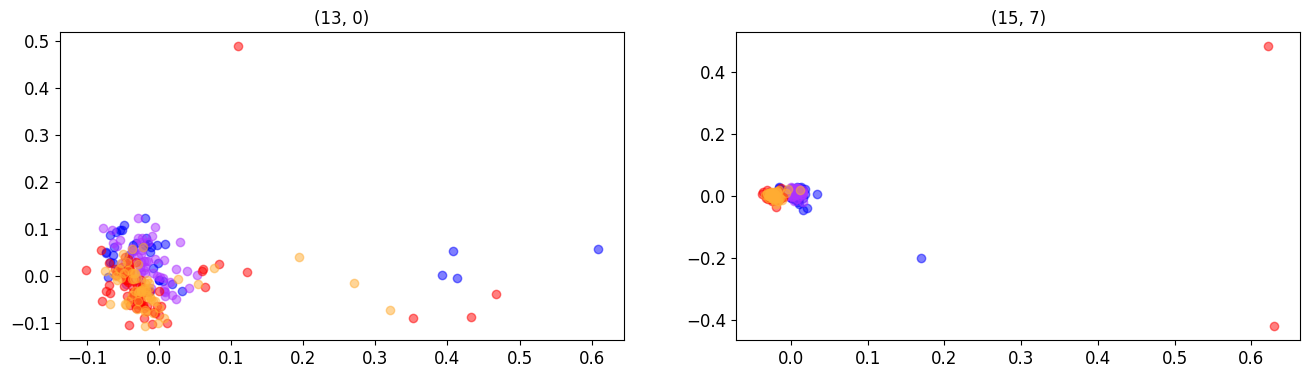

In [7]:
#heads = [(6,12), (6,13), (13,0), (13,11), (14,2), (14,21)]#, (15,6), (15,7), (11,17), (31,20), (31,14), (31,7)] #(3,4), (17, 11), (9,10) ,  (17,22) , (16,8),
# (13,11),

all_X_train = np.concatenate([separated_activations[i] for i in train_set_idxs], axis = 0)
all_X_val = np.concatenate([separated_activations[i] for i in val_set_idxs], axis = 0)
y_train = np.concatenate([separated_labels[i] for i in train_set_idxs], axis = 0)
y_val = np.concatenate([separated_labels[i] for i in val_set_idxs], axis = 0)
heads =[(13,0), (15,7)] #+list(heads_true_direction) 
plot_pcas(all_X_train, all_X_val, y_train, y_val, heads, rm_outliers=False, slice_idx=32)

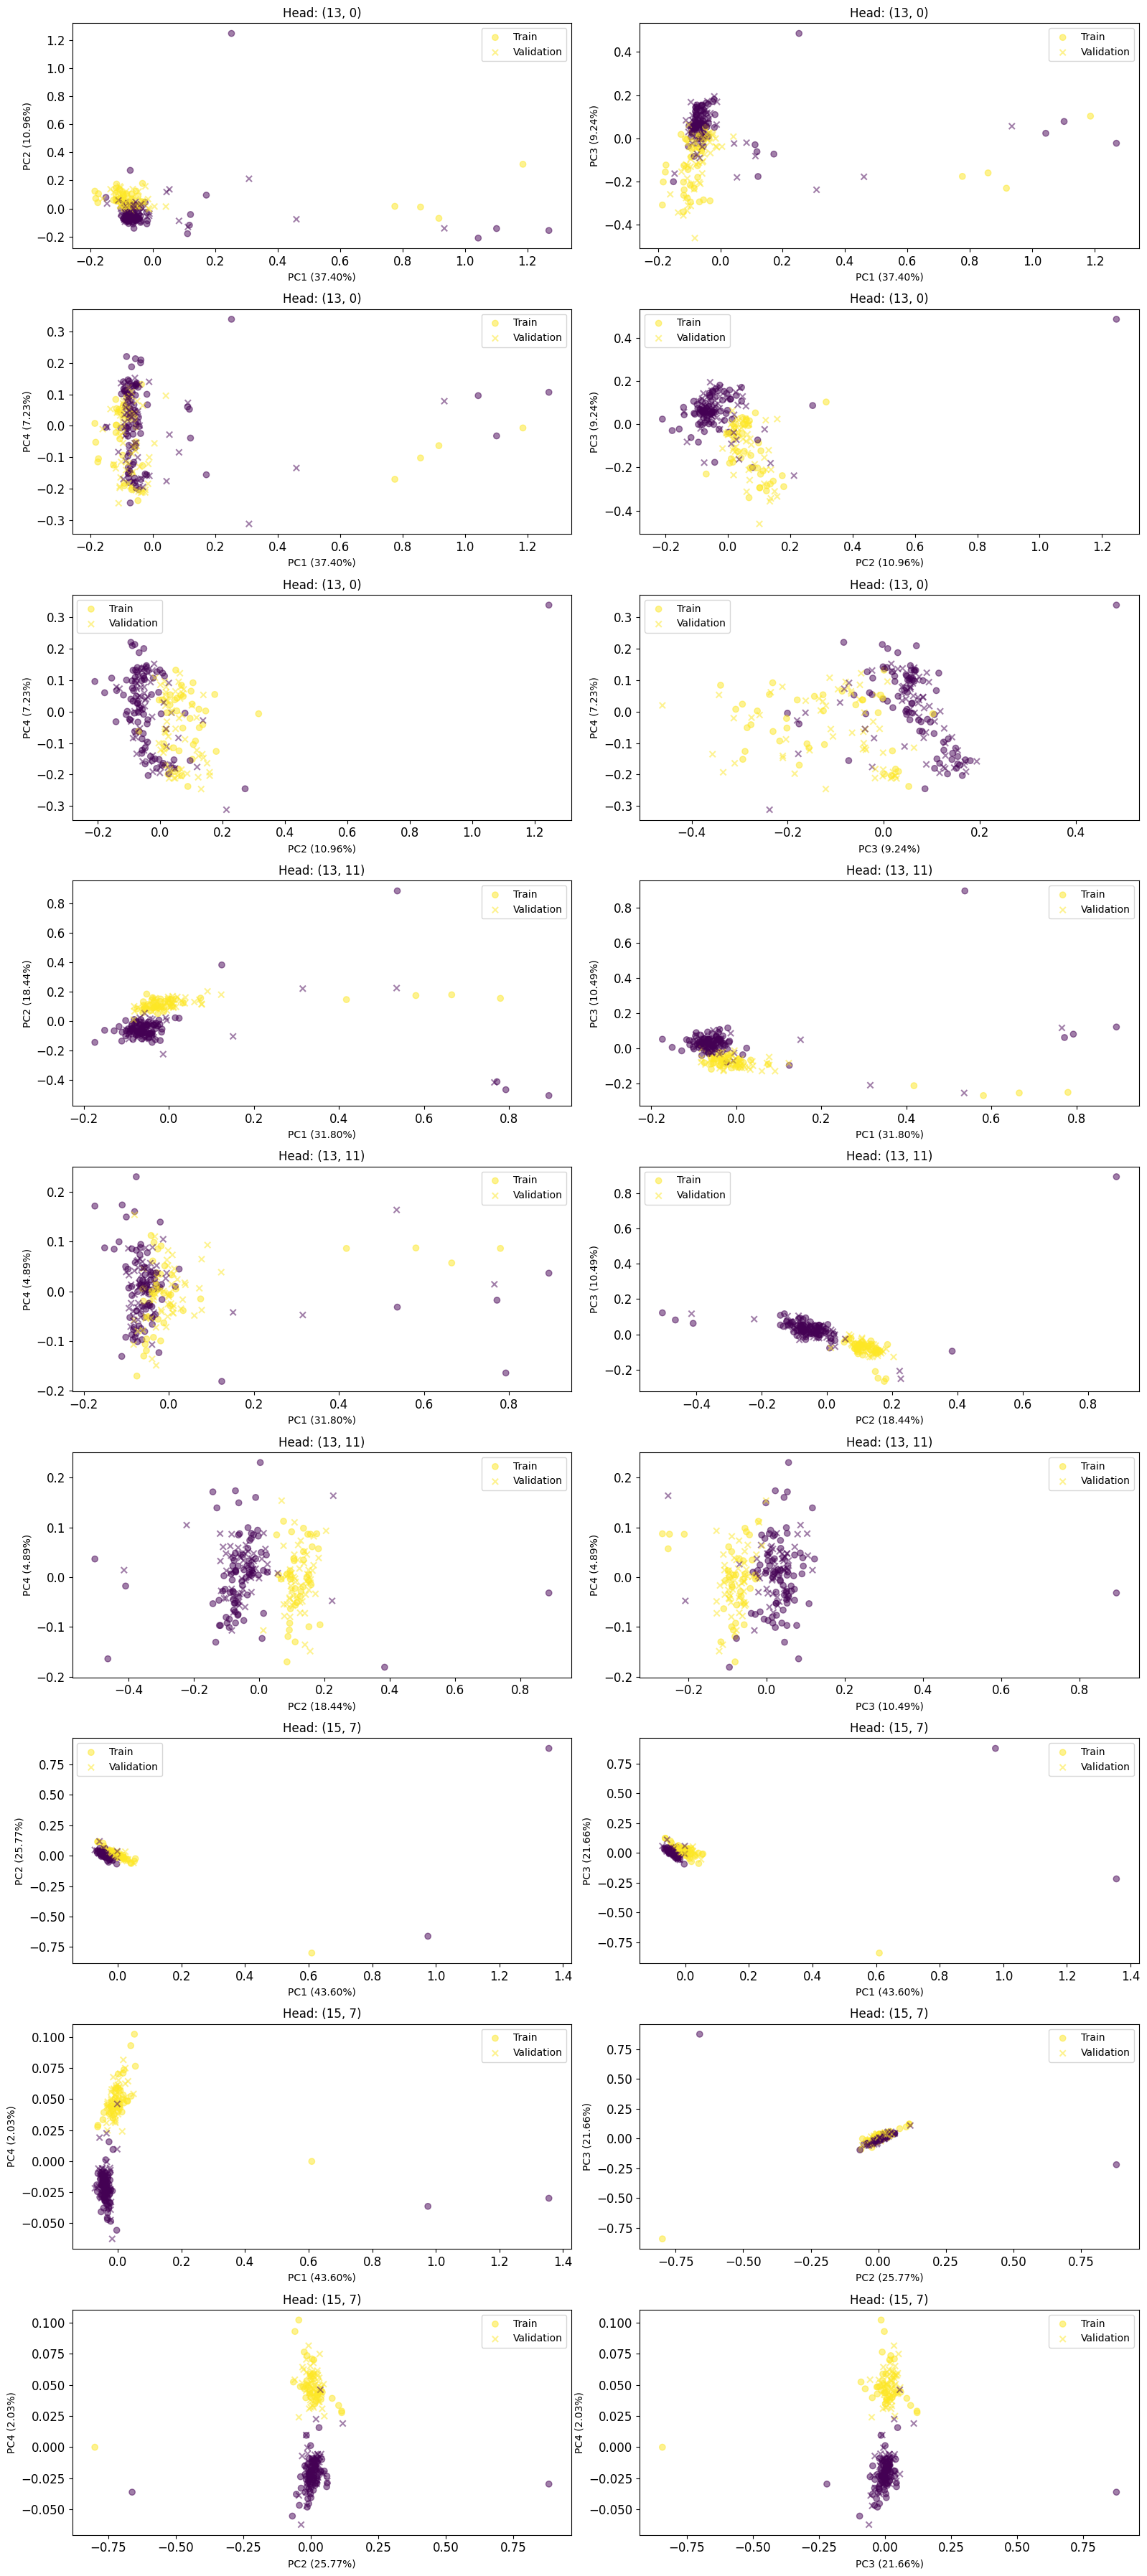

In [34]:
heads_true_direction = [(13,0), (13,11), (15,7)]
heads = heads_true_direction
plot_pcas_nd(all_X_train, all_X_val, y_train, y_val, heads, rm_outliers=False)

In [8]:
# outlier_removal_heads = [(15,5), (15,6)]
# heads = outlier_removal_heads 
# plot_pcas_nd(all_X_train, all_X_val, y_train, y_val, heads, rm_outliers=True)

(116, 8)
Head: (15, 5)
Explained Variance Ratio: [0.45458636 0.21724636]
(116, 8)
Head: (15, 6)
Explained Variance Ratio: [0.46024604 0.27172348]


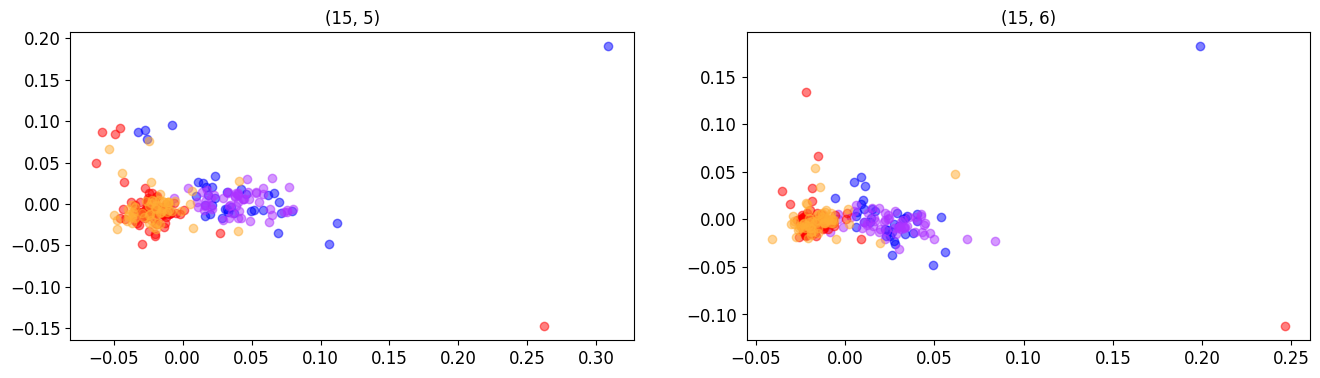

In [16]:
#heads = heads_false_direction#[(0,10), (0,26), (0,29), (0,30), (0,31)]#, (15,6), (15,7), (11,17), (31,20), (31,14), (31,7)] #(3,4), (17, 11), (9,10) ,  (17,22) , (16,8),
heads = [(15,5), (15,6)]
plot_pcas(all_X_train, all_X_val, y_train, y_val, heads, rm_outliers=False, slice_idx=8)

Explained Variance: [0.01964305 0.00270628]
Explained Variance Ratio: [0.78919139 0.10872938]
Explained Variance: [0.01964305 0.00270628]
Explained Variance Ratio: [0.78919139 0.10872938]
Explained Variance: [0.00545043 0.00379649]
Explained Variance Ratio: [0.39495724 0.27510703]
Explained Variance: [0.00857669 0.00437964]
Explained Variance Ratio: [0.37998334 0.1940363 ]
Explained Variance: [0.01181755 0.00819986]
Explained Variance Ratio: [0.31488371 0.21848879]
Explained Variance: [0.06425717 0.03144101]
Explained Variance Ratio: [0.30172345 0.14763321]


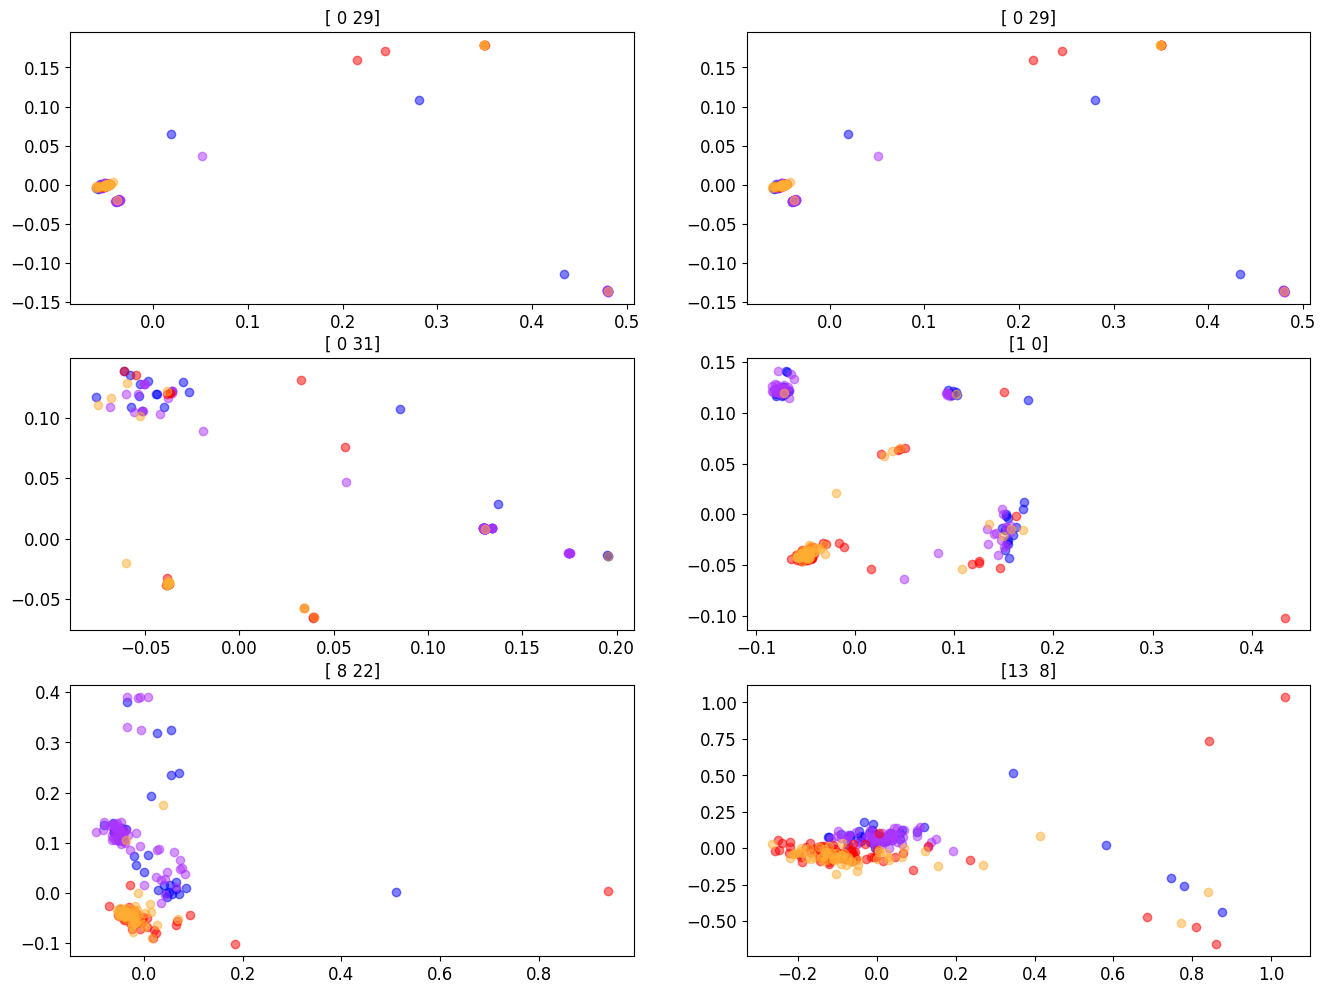

In [38]:
heads = heads_undefined_direction#[(0,10), (0,26), (0,29), (0,30), (0,31)]#, (15,6), (15,7), (11,17), (31,20), (31,14), (31,7)] #(3,4), (17, 11), (9,10) ,  (17,22) , (16,8),
plot_pcas(all_X_train, all_X_val, y_train, y_val, heads, rm_outliers=False)

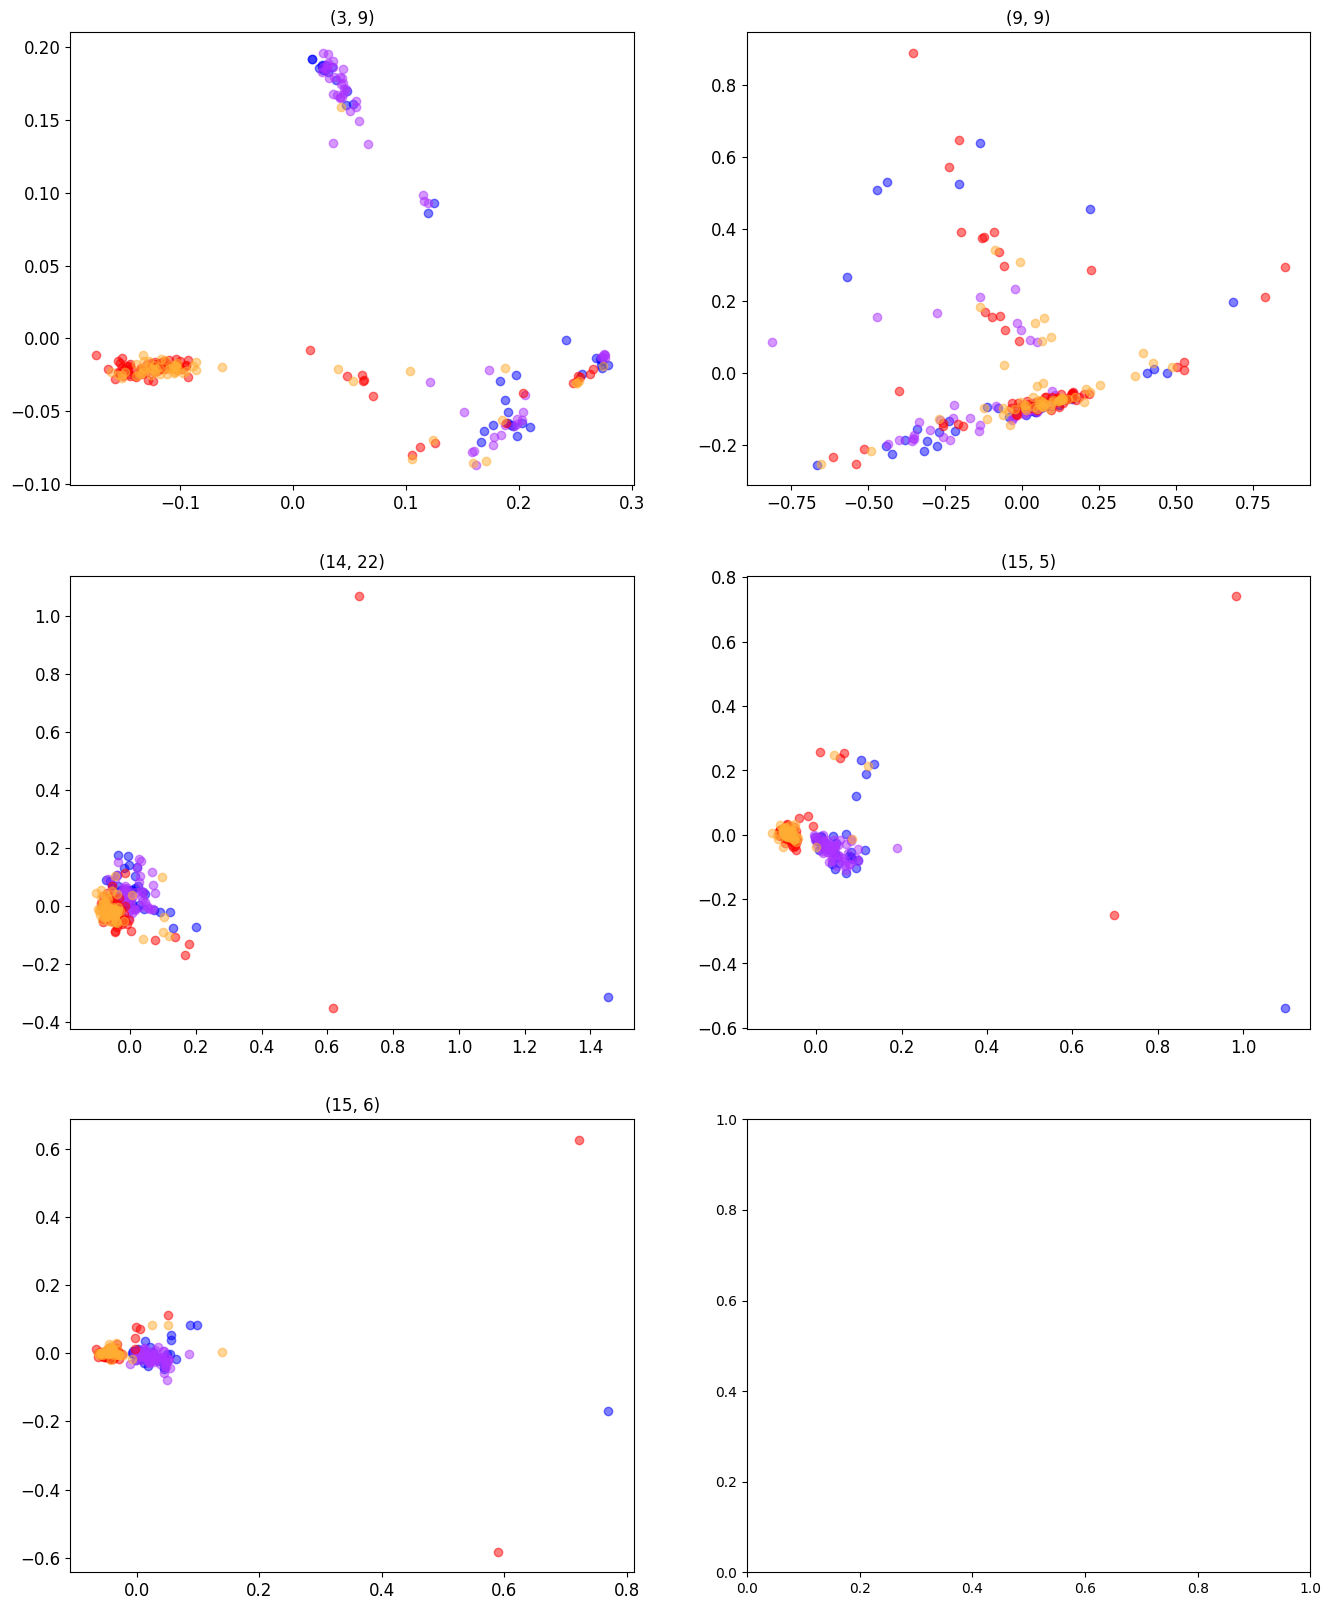

In [36]:
heads = [(3,9), (9,9), (14,22), (15,5), (15,6)]#, (15,6), (15,7), (11,17), (31,20), (31,14), (31,7)] #(3,4), (17, 11), (9,10) ,  (17,22) , (16,8),
plot_pcas(all_X_train, all_X_val, y_train, y_val, heads)

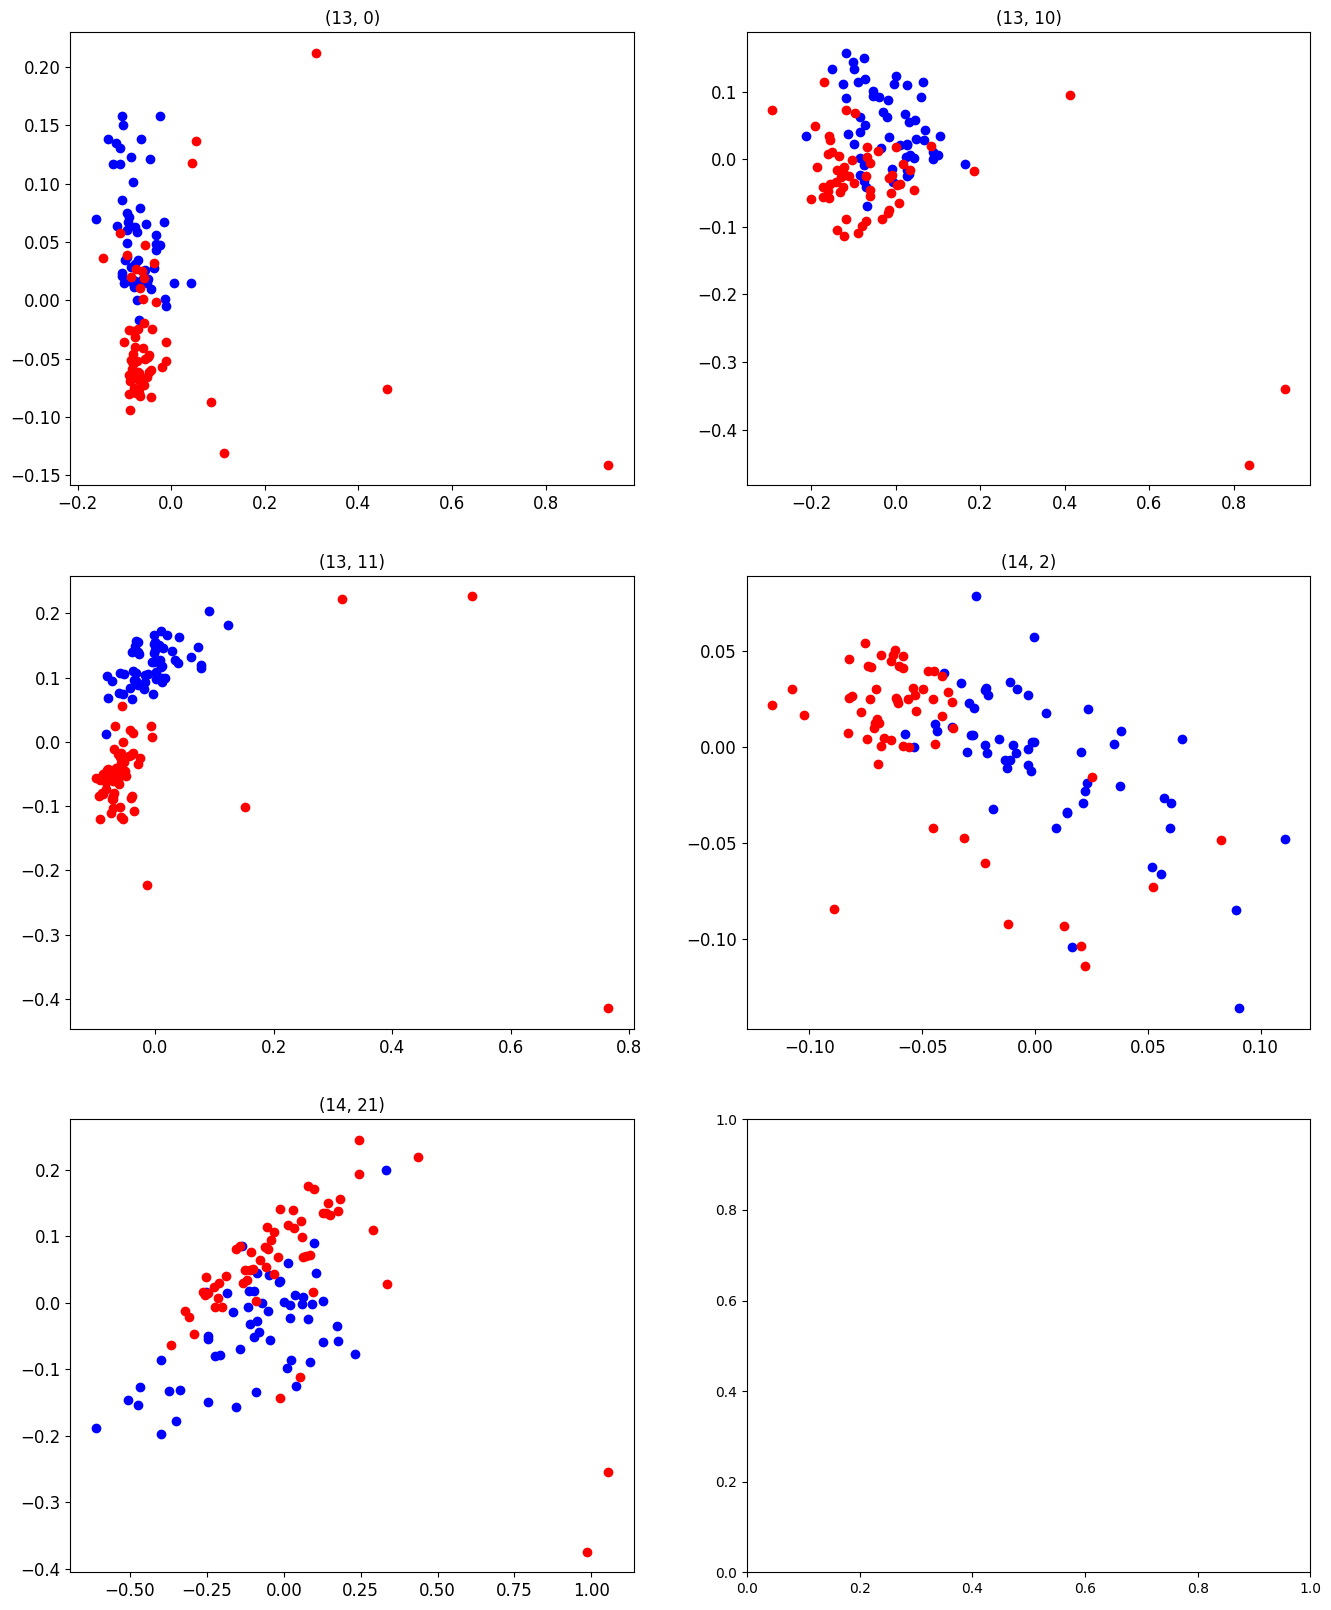

In [15]:


#heads = [(3,9), (9,9), (10,14), (13,0), (13,10), (13, 11), (14,2), (15,5), (15,6), (15,7), (11,17), (31,20), (31,14), (31,7)] #(3,4), (17, 11), (9,10) ,  (17,22) , (16,8),
heads = [(13,0), (13,10), (13, 11), (14,2), (14,21)]#, (15,6), (15,7), (11,17), (31,20), (31,14), (31,7)] #(3,4), (17, 11), (9,10) ,  (17,22) , (16,8),
n_rows = len(heads) // 2 + 1
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(16, 20))

all_X_train = np.concatenate([separated_activations[i] for i in train_set_idxs], axis = 0)
all_X_val = np.concatenate([separated_activations[i] for i in val_set_idxs], axis = 0)
y_train = np.concatenate([separated_labels[i] for i in train_set_idxs], axis = 0)
y_val = np.concatenate([separated_labels[i] for i in val_set_idxs], axis = 0)

for id, head in enumerate(heads):

    ax = fig.axes[id] 
    ax.set_title(str(head))
    layer = head[0]
    h = head[1]
    
    X_train = all_X_train[:,layer,h,:]
    X_train.shape

    X_val = all_X_val[:,layer,h,:]
    X_val.shape

    # # Standardizing the data
    # scaler = StandardScaler()
    # scaler = scaler.fit(X_train)
    # X_train = scaler.transform(X_train)
    # X_val = scaler.transform(X_val)

    # # Filtering for outliers
    # X_val, y_val = remove_outliers(X_train, X_val, y_val)
    # X_train, y_train = remove_outliers(X_train, X_train, y_train)

    cl = PCA(n_components=2, random_state=args.seed).fit(X_train)
    X_reduction = cl.transform(X_train)
    X_val_reduction = cl.transform(X_val)
    
    indexes_val = np.where(y_val == True)[0]
    samples_1 = [X_val_reduction[i] for i in indexes_val]

    indexes_val = np.where(y_val == False)[0]
    samples_2 = [X_val_reduction[i] for i in indexes_val]

    # indexes_val = np.where(y_train == True)[0]
    # samples_1 = [X_reduction[i] for i in indexes_val]

    # indexes_val = np.where(y_train == False)[0]
    # samples_2 = [X_reduction[i] for i in indexes_val]
    # print(str(head))
    # print(calculate_snr(samples_1, samples_2))

    for label, color in zip([True, False], ['blue', 'red']):

        #color = ['blue', 'red']
        #ax.scatter(X_reduction[:,0], X_reduction[:,1], c=color[0])#, label=str(label))

        #ax.scatter(X_val_reduction[:,0], X_val_reduction[:,1], c=color[1])
        #indexes_train = np.where(y_train == label)[0]
        #indexes = np.concatenate([indexes_train, indexes_val])
        
        indexes_val = np.where(y_val == label)[0]
        samples = [X_val_reduction[i] for i in indexes_val]

        for idx in indexes_val:

            ax.scatter(X_val_reduction[idx,0], X_val_reduction[idx, 1], c=color, label=str(idx))
            
            #for i, idx in enumerate(df_reduced[indices_to_keep].index):
                #if idx in df_reduced[df_reduced['req_id'].isin(filt)].index :
                #ax.text(reduced_embeddings[idx, 0], reduced_embeddings[idx, 1], str(idx))
                            #print(idx)

            #ax.scatter(X_reduction[idx,0], X_reduction[idx, 1], c=color, label=str(idx))
            #ax.scatter(X_reduction[idx,0], 1, c=color, label=str(idx))
            
    # Adjusting tick label font sizes using tick_params
    ax.tick_params(axis='x', labelsize=12)  # Adjust font size for x-axis tick labels
    ax.tick_params(axis='y', labelsize=12)  # Adjust font size for y-axis tick labels
    
                     

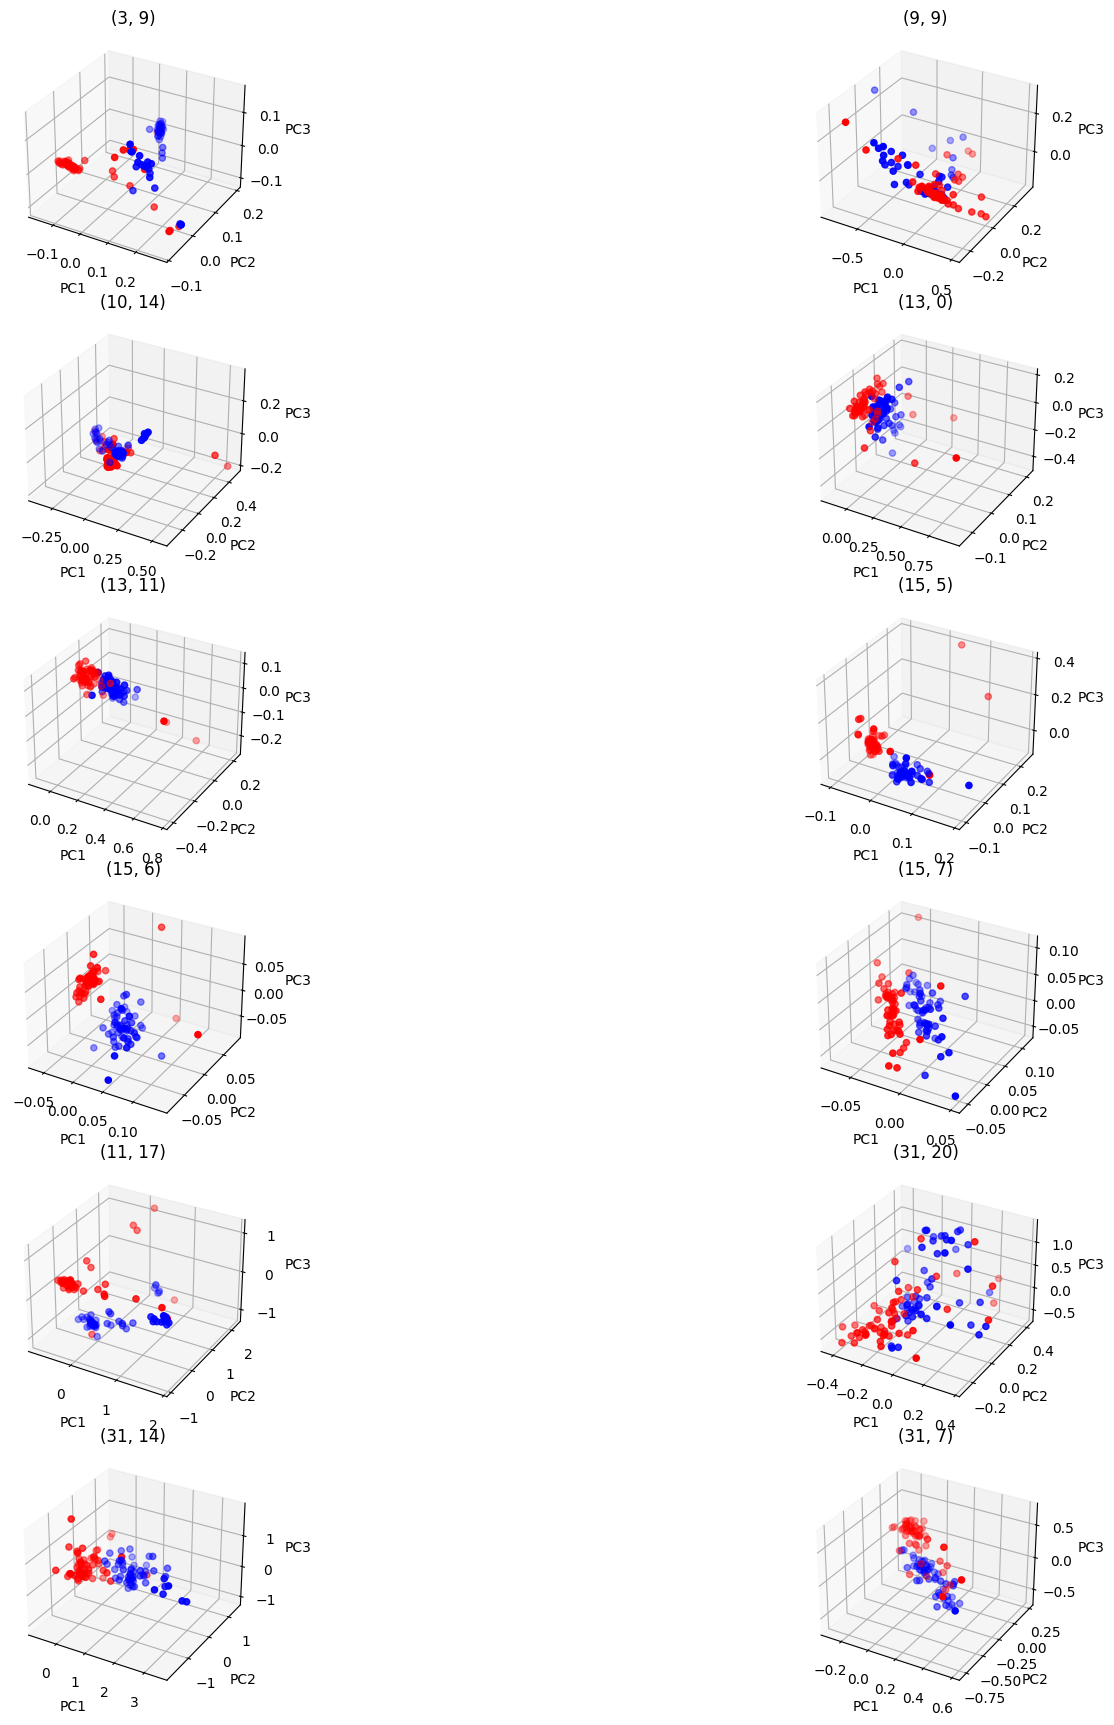

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


heads = [(3,9), (9,9), (10,14), (13,0), (13, 11),(15,5), (15,6), (15,7), (11,17), (31,20), (31,14), (31,7)] #(3,4), (17, 11), (9,10) ,  (17,22) , (16,8),


# Modify your plotting loop to create 3D plots
n_rows = len(heads) // 2 + 1
fig = plt.figure(figsize=(16, 20))

all_X_train = np.concatenate([separated_activations[i] for i in train_set_idxs], axis = 0)
#print(all_X_train.shape)
all_X_val = np.concatenate([separated_activations[i] for i in val_set_idxs], axis = 0)
y_train = np.concatenate([separated_labels[i] for i in train_set_idxs], axis = 0)
#print(y_train.shape)
y_val = np.concatenate([separated_labels[i] for i in val_set_idxs], axis = 0)


for id, head in enumerate(heads):
    # Create a 3D subplot
    ax = fig.add_subplot(n_rows, 2, id + 1, projection='3d')
    ax.set_title(str(head))
    layer = head[0]
    h = head[1]
    
    X_train = all_X_train[:, layer, h, :]
    X_val = all_X_val[:, layer, h, :]

    # Using PCA for 3D dimensionality reduction
    pca = PCA(n_components=3, random_state=42)  # Adjust the random_state as per your setup
    pca.fit(X_train)
    
    X_train_pca = pca.transform(X_train)
    X_val_pca = pca.transform(X_val)
    
    # Splitting the validation set based on the labels
    indexes_val_true = np.where(y_val == True)[0]
    indexes_val_false = np.where(y_val == False)[0]
    
    samples_true = X_val_pca[indexes_val_true]
    samples_false = X_val_pca[indexes_val_false]

    # Plotting
    ax.scatter(samples_true[:, 0], samples_true[:, 1], samples_true[:, 2], c='blue', label='True')
    ax.scatter(samples_false[:, 0], samples_false[:, 1], samples_false[:, 2], c='red', label='False')

    # Set labels for axes
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    
    # Adjust tick label size (optional)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

In [ ]:
ratios = []
separated_head_wise_activations = separated_activations


all_X_train = np.concatenate([separated_head_wise_activations[i] for i in train_set_idxs], axis = 0)
print(all_X_train.shape)
all_X_val = np.concatenate([separated_head_wise_activations[i] for i in val_set_idxs], axis = 0)
y_train = np.concatenate([separated_labels[i] for i in train_set_idxs], axis = 0)
print(y_train.shape)
y_val = np.concatenate([separated_labels[i] for i in val_set_idxs], axis = 0)

for layer in tqdm(range(num_layers)): 
        for h in range(num_heads): 
                
                label =1
                indexes_yes = np.where(y_train == label)[0]
                ##indexes_val = np.where(y_val == 1)[0]
                #indexes = np.concatenate([indexes_train, indexes_val])

                
                ## needs to be split
                set1 = all_X_train[indexes_yes,layer,h,:]
                
                label =0
                indexes_no = np.where(y_train == label)[0]
                set2 = all_X_train[indexes_no,layer,h,:]

                # Assuming set1 and set2 are your two classes of data
                mean1 = np.mean(set1, axis=0)
                mean2 = np.mean(set2, axis=0)

                # Between-class variance (squared difference between class means)
                between_class_variance = np.sum((mean1 - mean2) ** 2)

                # Within-class variances (average variance within each class)
                within_class_variance = (np.var(set1, axis=0).mean() + np.var(set2, axis=0).mean()) / 2

                # Ratio similar to Fisher's criterion but without projection
                ratio = between_class_variance / within_class_variance

                ratios.append(ratio)

ratios = np.array(ratios)

In [ ]:
 ## needs to be split
# set1 = all_X_train[indexes_yes,layer,h,:]

# label =0
# indexes_no = np.where(y_train == label)[0]
# set2 = all_X_train[indexes_no,layer,h,:]

layer = 3
h = 9

X_train = all_X_train[:,layer,h,:]
X_train.shape

X_val = all_X_val[:,layer,h,:]
X_val.shape

#cl = TSNE(n_components=2, random_state=args.seed).fit(X_train)
cl = PCA(n_components=2, random_state=args.seed).fit(X_train)
X_reduction = cl.transform(X_train)
X_val_reduction = cl.transform(X_val)


indexes_val = np.where(y_val == True)[0]
samples_1 = [X_val_reduction[i] for i in indexes_val]

indexes_val = np.where(y_val == False)[0]
samples_2 = [X_val_reduction[i] for i in indexes_val]

set1 = samples_1
set2 = samples_2

# Assuming set1 and set2 are your two classes of data
mean1 = np.mean(set1, axis=0)
mean2 = np.mean(set2, axis=0)

print("Mean True", mean1)
print("Mean False", mean2)

print("Variance True", np.var(set1, axis=0).mean())
print("Variance False", np.var(set2, axis=0).mean())

print("Summed_ Variance:",np.var(set1, axis=0).mean() + np.var(set2, axis=0).mean())

# Between-class variance (squared difference between class means)
between_class_variance = np.sum((mean1 - mean2) ** 2)

# Within-class variances (average variance within each class)
within_class_variance = (np.var(set1, axis=0).mean() + np.var(set2, axis=0).mean()) / 2

# Ratio similar to Fisher's criterion but without projection
ratio = between_class_variance / within_class_variance#
print("Ratio", ratio)